# Kritika Chauhan
# Task 3: Exploratory Data Analysis on Dataset - Terrorism 

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [3]:
df=pd.read_csv(r'C:\Users\tdeor\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv',encoding='latin1')

## Exploring the data

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
df.shape

(181691, 135)

In [7]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
df['nwound']=df['nwound'].fillna(0)
df['nkill']=df['nkill'].fillna(0)

## Visualising the data on the basis of various parameters

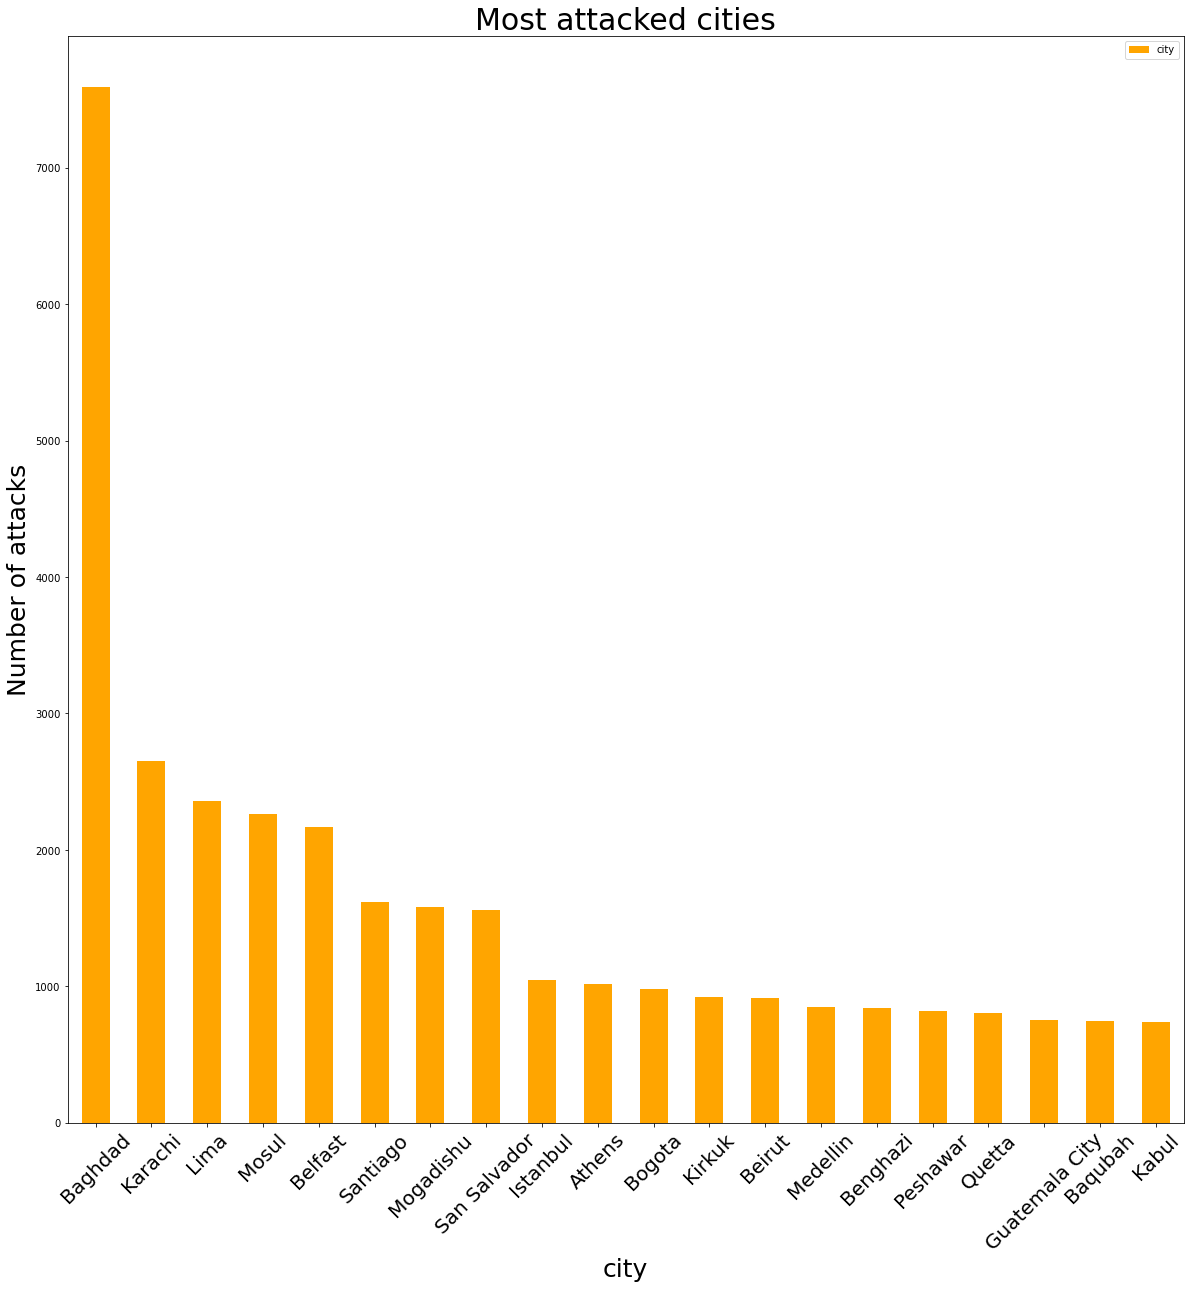

In [9]:
df['city'].value_counts().to_frame().drop('Unknown').sort_values('city', axis=0,ascending=False).head(20).plot(kind='bar',figsize=(20,20),color='orange')
plt.xticks(rotation=45,fontsize=20)
plt.title("Most attacked cities",fontsize=30)
plt.xlabel('city',fontsize=25)
plt.ylabel("Number of attacks", fontsize=25)
plt.show()

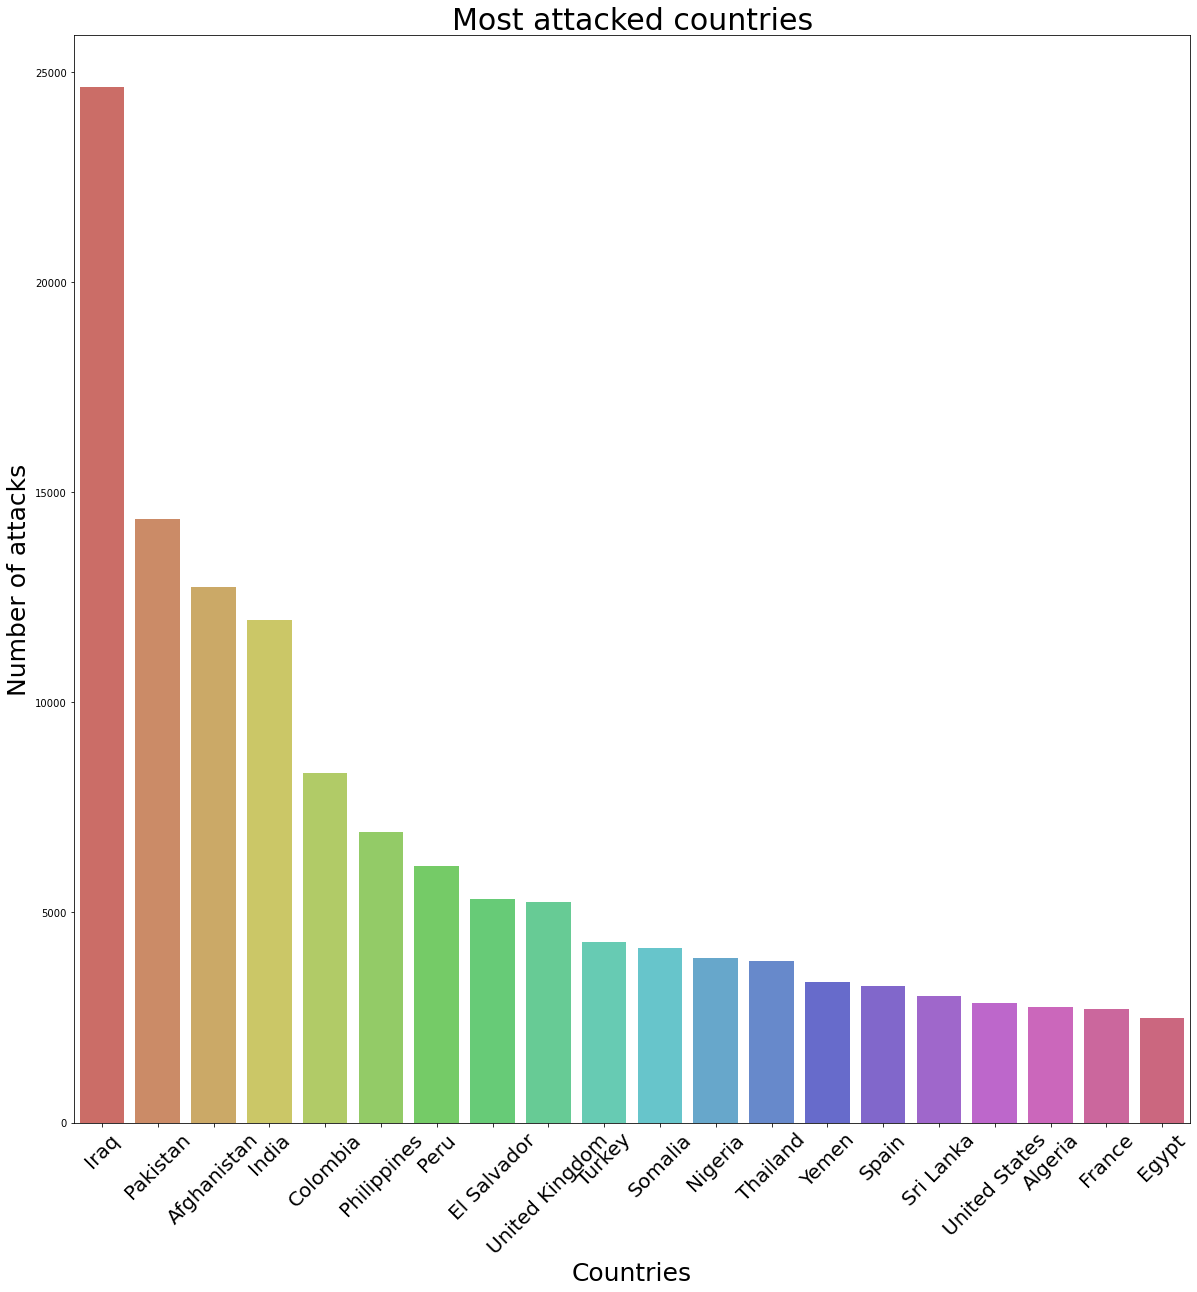

In [34]:
plt.subplots(figsize=(20,20))
sns.barplot(df['country_txt'].value_counts()[:20].index,df['country_txt'].value_counts()[:20].values,palette='hls')
plt.xticks(rotation=45,fontsize=20)
plt.title("Most attacked countries",fontsize=30)
plt.xlabel('Countries',fontsize=25)
plt.ylabel("Number of attacks", fontsize=25)
plt.show()

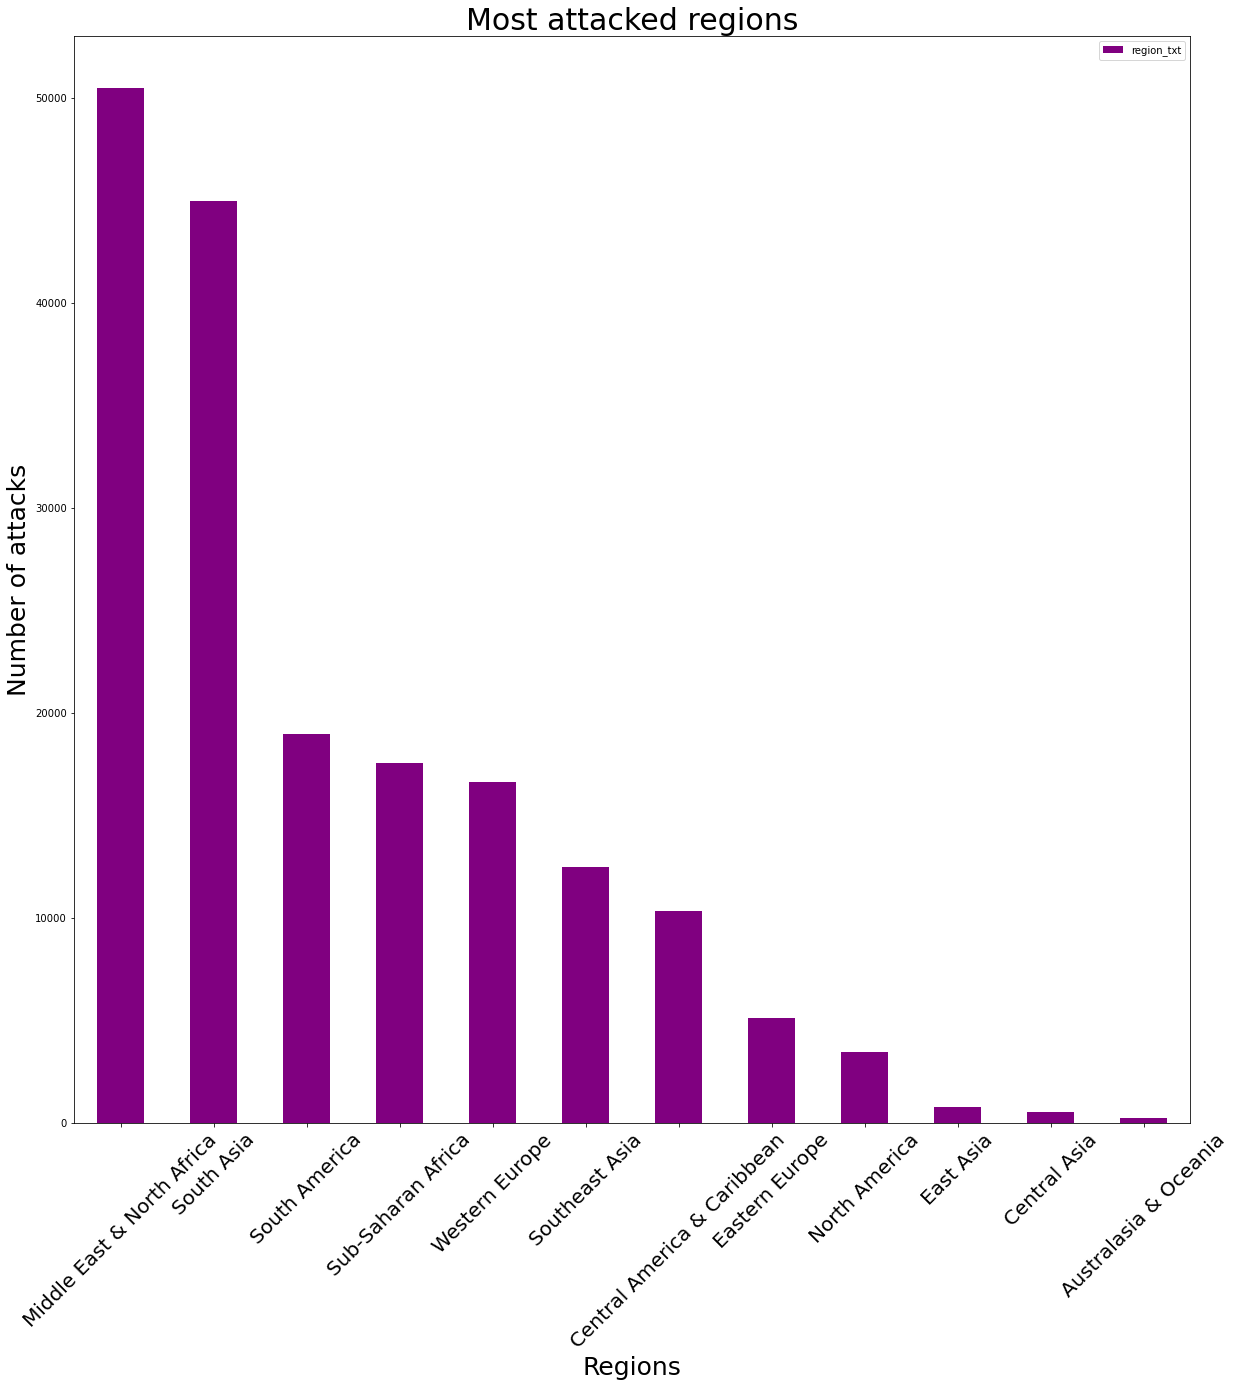

In [11]:
df['region_txt'].value_counts().to_frame().sort_values('region_txt', axis=0,ascending=False).head(20).plot(kind='bar',figsize=(20,20),color='purple')
plt.xticks(rotation=45,fontsize=20)
plt.title("Most attacked regions",fontsize=30)
plt.xlabel('Regions',fontsize=25)
plt.ylabel("Number of attacks", fontsize=25)
plt.show()

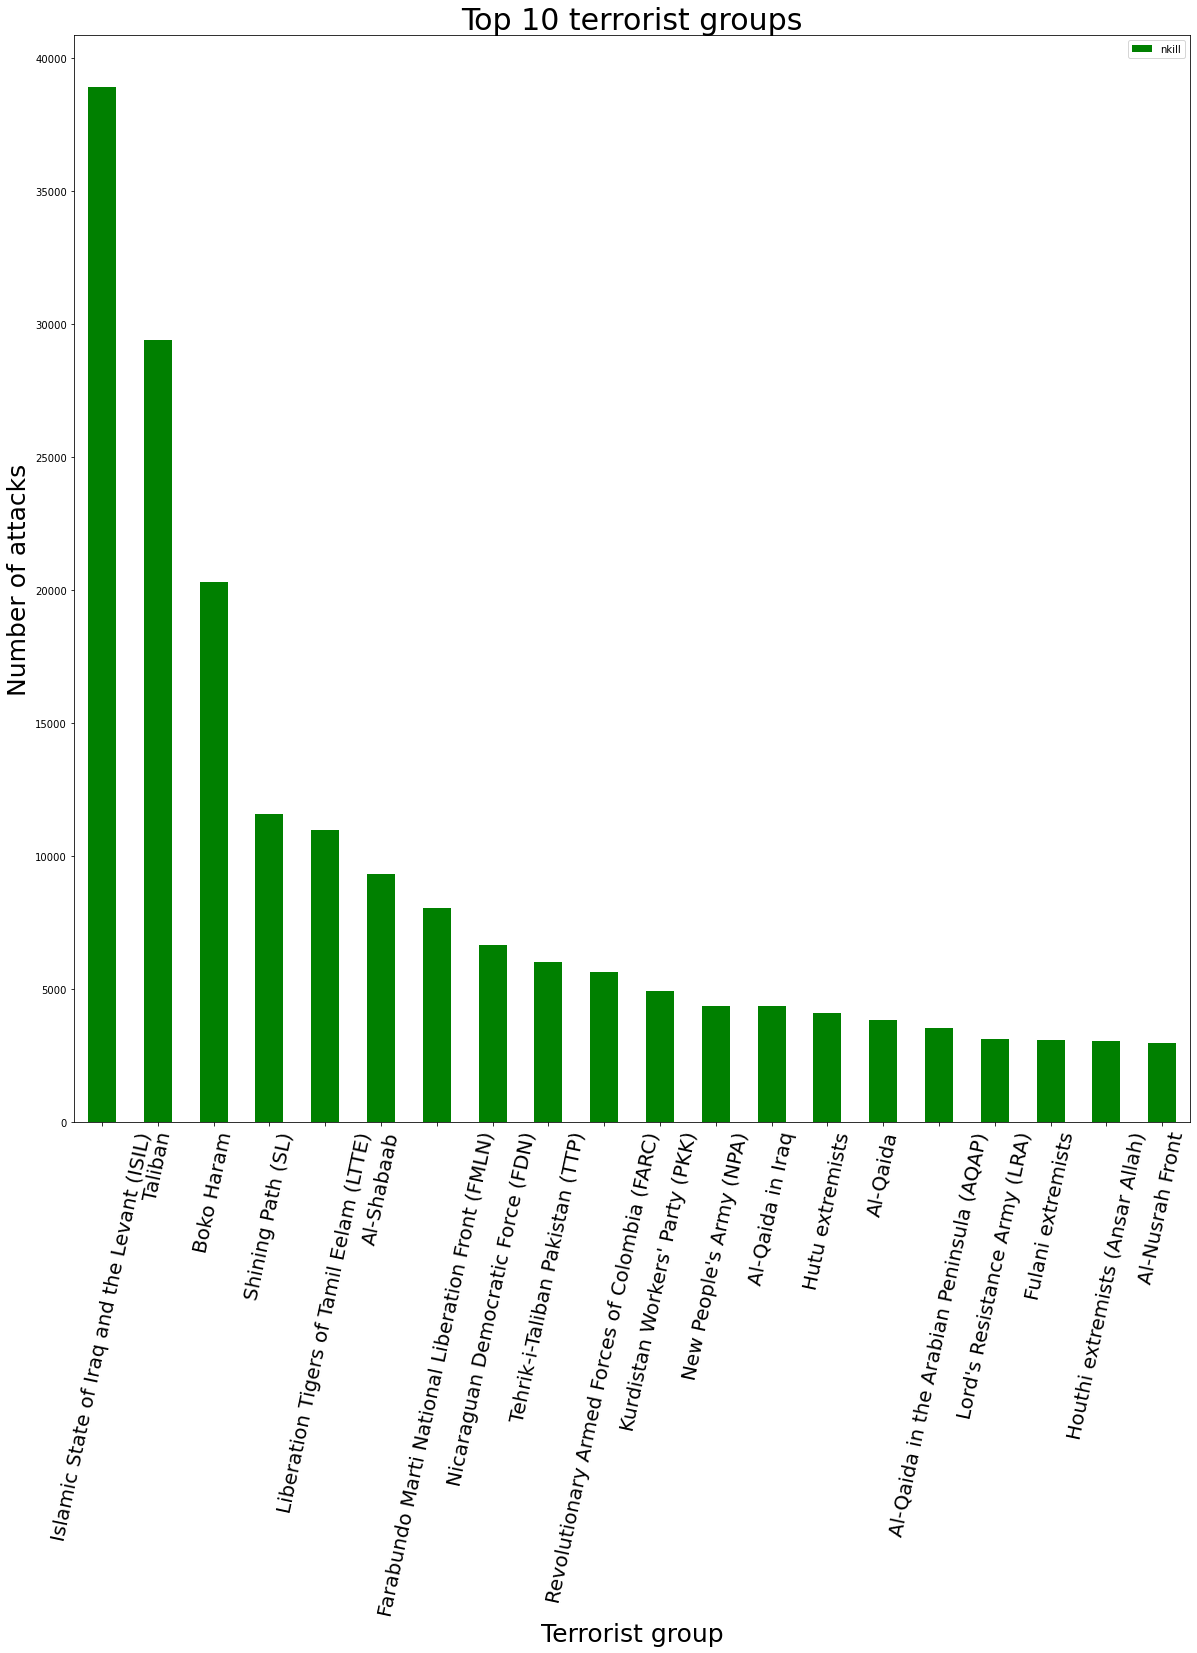

In [22]:

df[['gname','nkill']].groupby(['gname'],axis=0).sum().drop('Unknown').sort_values('nkill',ascending=False).head(20).plot(kind='bar',color='green',figsize=(20,20))
plt.title("Top 10 terrorist groups",fontsize=30)
plt.xticks(rotation=78,fontsize=20)
plt.xlabel("Terrorist group",fontsize=25)
plt.ylabel("Number of attacks",fontsize=25)
plt.show()

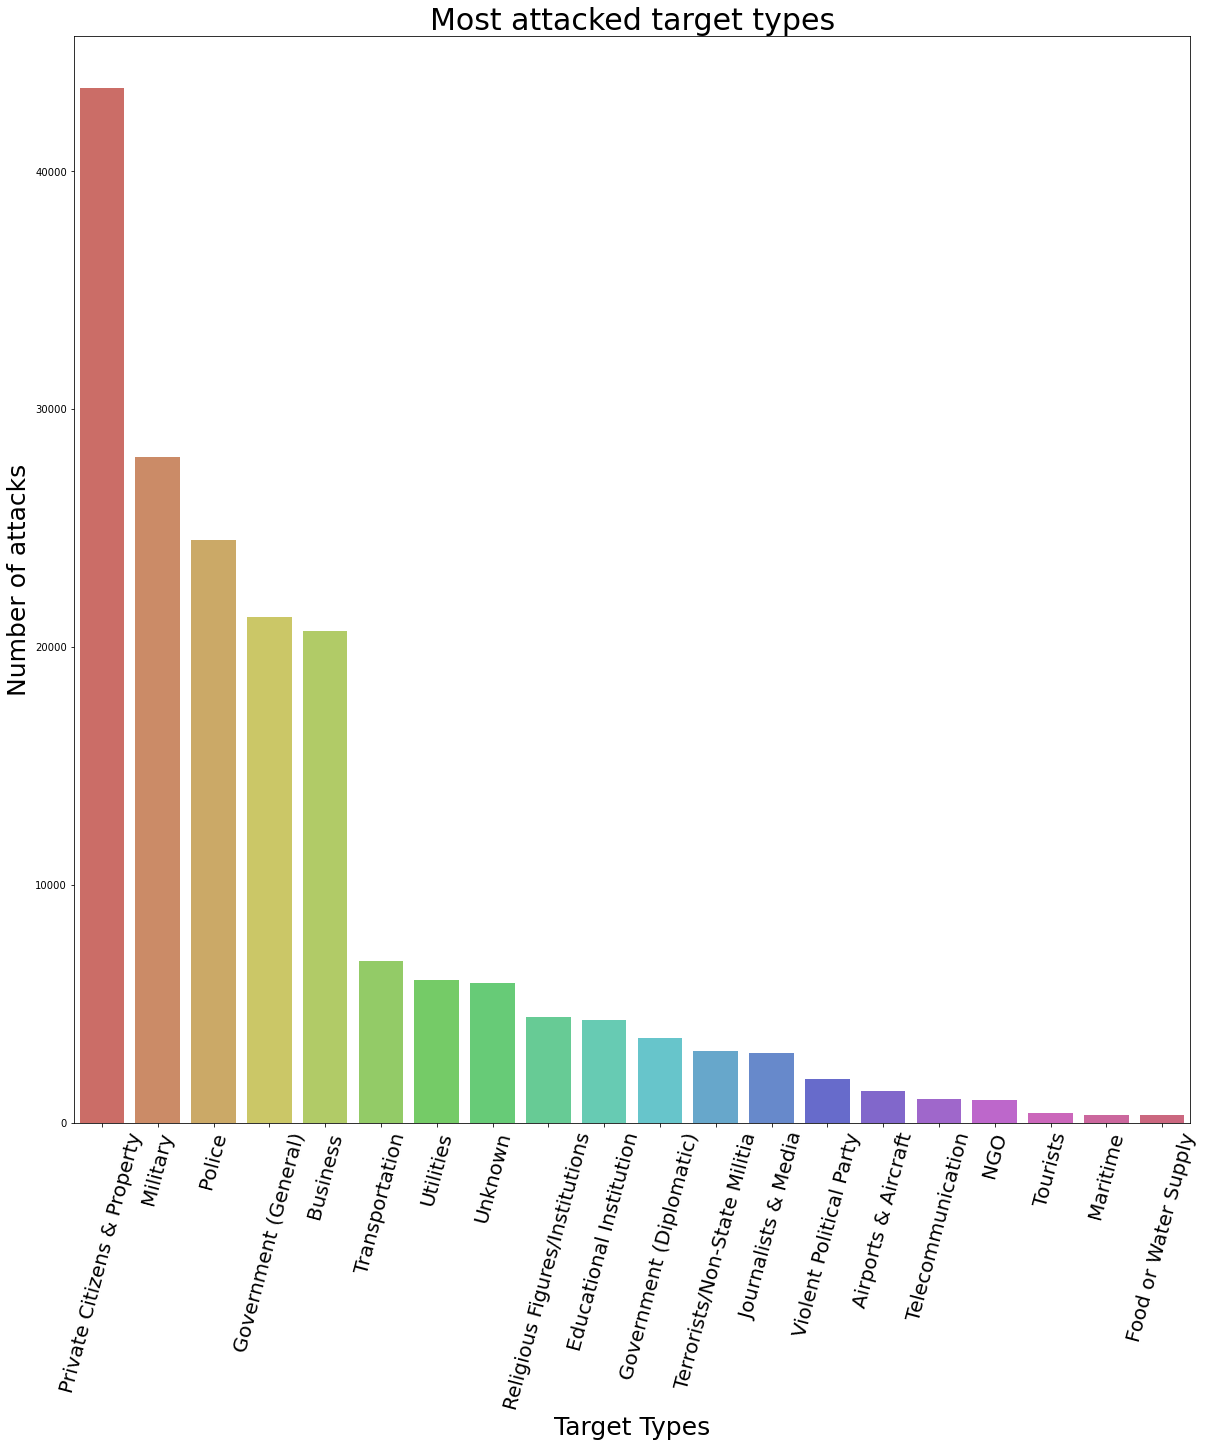

In [29]:
plt.subplots(figsize=(20,20))
sns.countplot(df['targtype1_txt'],order=df['targtype1_txt'].value_counts()[:20].index,palette='hls')
plt.xticks(rotation=75,fontsize=20)
plt.title("Most attacked target types",fontsize=30)
plt.xlabel('Target Types',fontsize=25)
plt.ylabel("Number of attacks", fontsize=25)
plt.show()

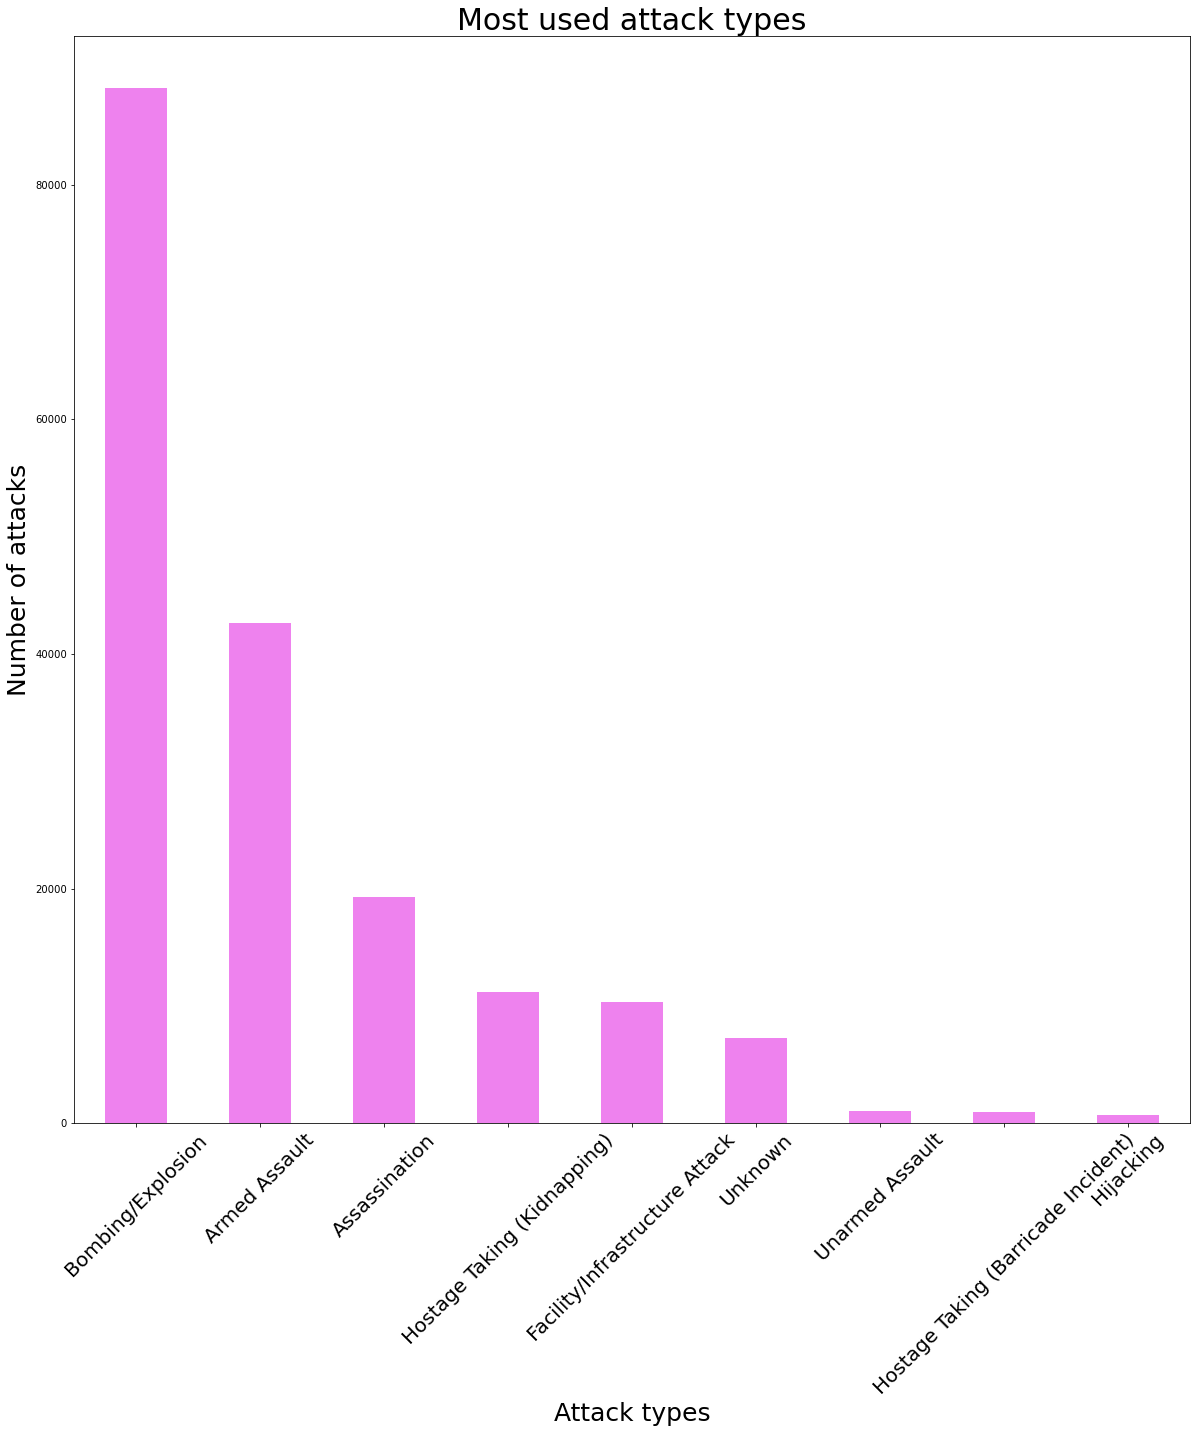

In [31]:
df['attacktype1_txt'].value_counts().plot(kind='bar',color='violet',figsize=(20,20))
plt.title("Most used attack types",fontsize=30)
plt.xticks(rotation=45,fontsize=20)
plt.xlabel("Attack types",fontsize=25)
plt.ylabel("Number of attacks",fontsize=25)
plt.show()

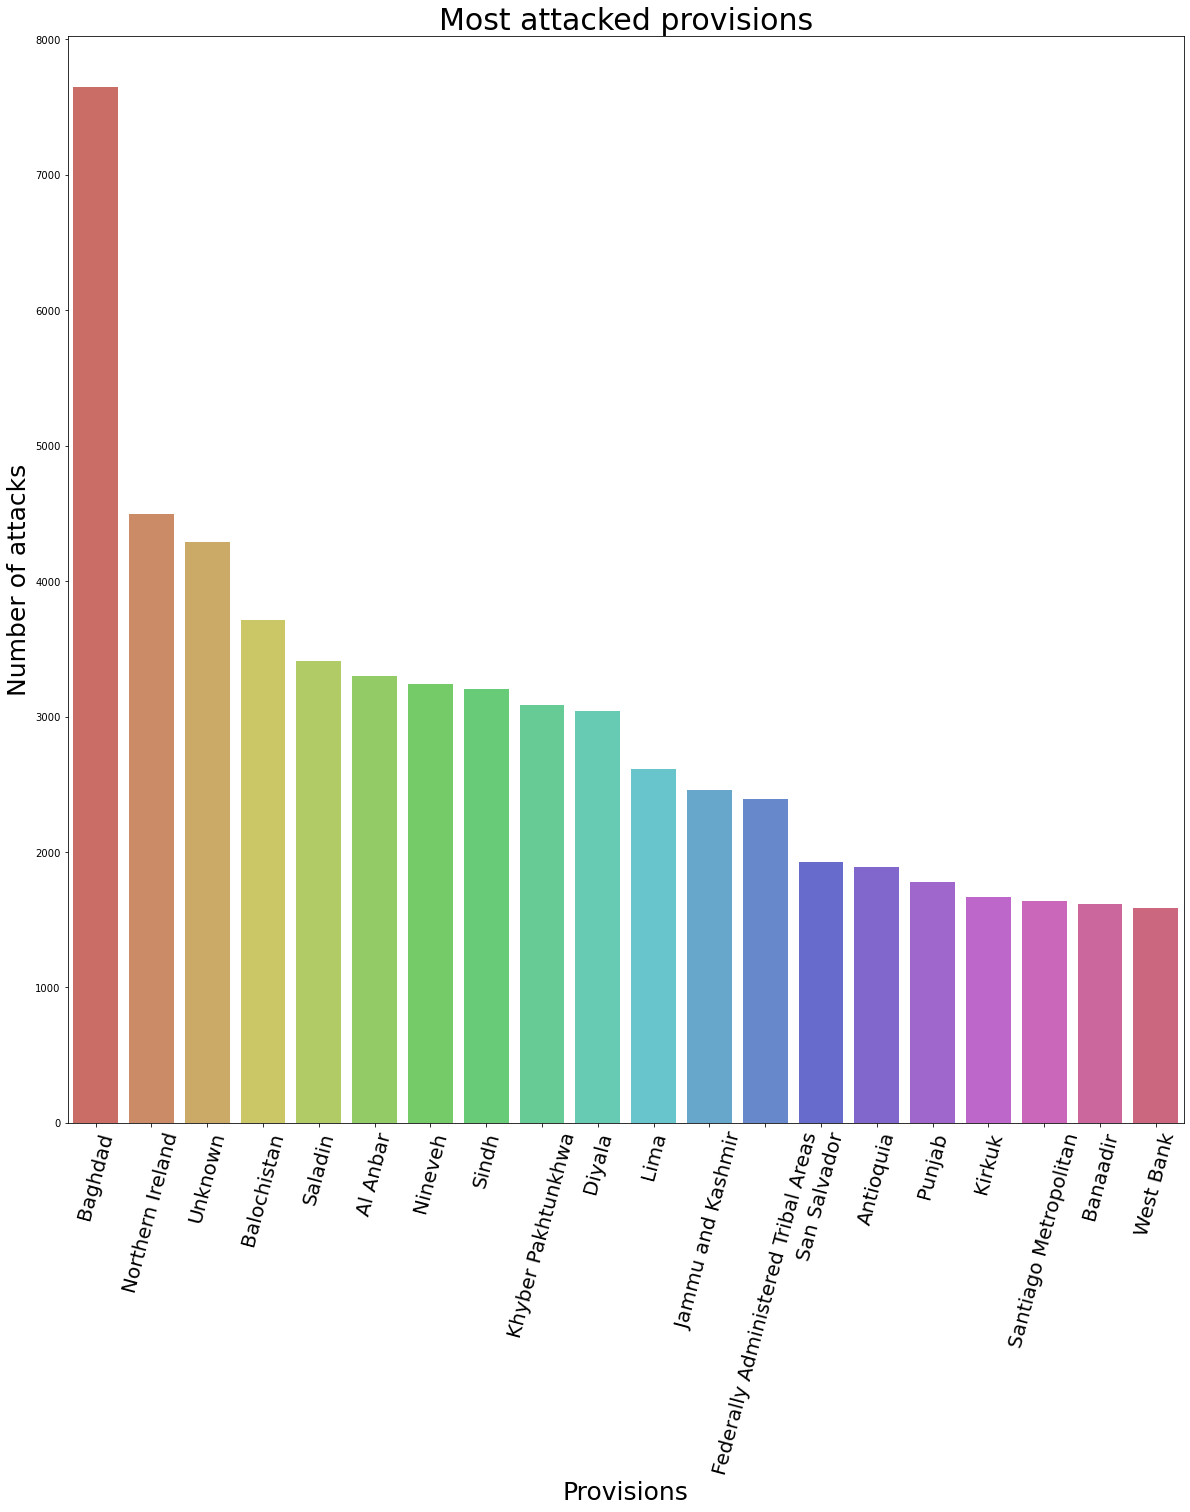

In [38]:
plt.subplots(figsize=(20,20))
sns.barplot(df['provstate'].value_counts()[:20].index,df['provstate'].value_counts()[:20].values,palette='hls')
plt.xticks(rotation=75,fontsize=20)
plt.title("Most attacked provisions",fontsize=30)
plt.xlabel('Provisions',fontsize=25)
plt.ylabel("Number of attacks", fontsize=25)
plt.show()

### Hot zones:
### Most attacked city: Baghdad
### Most attacked country: Iraq
### Most attacked region: Middle east and north africa
### Most attacked provisions: Baghdad